In [ ]:
import glob

from potoo.plot import *
from potoo.util import *
import sklearn

from cache import *
from datasets import *
from features import *
from load import *
from sp14.model import *
from util import *

figsize('inline_short');

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp13birdchallenge_documentation.pdf',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset',
  '/Users/danb/hack/bubo/data/mlsp-2013/README.txt',
]

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/light_data/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/CVfolds_2.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/histogram_of_segments.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/rec_id2filename.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/rec_labels_test_hidden.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/sample_submission.csv',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/segment_features.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/species_list.txt',
]

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/CVfolds_2.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/rec_id2filename.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/rec_labels_test_hidden.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/sample_submission.csv',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/species_list.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs',
]

In [ ]:
# Boring
# pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/CVfolds_2.txt')[:50]

# Interesting
rec_id_to_filename_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/rec_id2filename.txt')
sample_submission_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/sample_submission.csv')
species_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/species_list.txt')

# This one has variable numbers of columns, so parse it manually
with open(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/rec_labels_test_hidden.txt') as f:
    rec_labels_test_hidden_df = (
        pd.DataFrame(line.rstrip().split(',', 1) for line in f.readlines())
        .T.set_index(0).T  # Pull first row into df col names
    )

In [ ]:
display(
    species_df.shape,
    species_df,
)

(19, 3)

,class_id,code,species
0,0,BRCR,Brown Creeper
1,1,PAWR,Pacific Wren
2,2,PSFL,Pacific-slope Flycatcher
3,3,RBNU,Red-breasted Nuthatch
4,4,DEJU,Dark-eyed Junco
5,5,OSFL,Olive-sided Flycatcher
6,6,HETH,Hermit Thrush
7,7,CBCH,Chestnut-backed Chickadee
8,8,VATH,Varied Thrush
9,9,HEWA,Hermit Warbler


In [ ]:
display(
    rec_id_to_filename_df.shape,
    rec_id_to_filename_df[:10],
)

(645, 2)

,rec_id,filename
0,0,PC1_20090513_050000_0010
1,1,PC1_20090513_070000_0010
2,2,PC1_20090606_050012_0010
3,3,PC1_20090606_070012_0010
4,4,PC1_20090705_050000_0010
5,5,PC1_20090705_070000_0010
6,6,PC1_20090804_050011_0010
7,7,PC1_20090804_070012_0010
8,8,PC1_20100513_043000_0010
9,9,PC1_20100513_043000_0720


In [ ]:
display(
    sample_submission_df.shape,
    sample_submission_df[:10],
)

(6137, 3)

,rec_id,species,probability
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
5,0,5,0
6,0,6,0
7,0,7,0
8,0,8,0
9,0,9,0


In [ ]:
# Test examples are '[labels]' = '?'
display(
    rec_labels_test_hidden_df.shape,
    rec_labels_test_hidden_df[:10],
)

(645, 2)

,rec_id,[labels]
1,0,?
2,1,?
3,2,"11,12"
4,3,None
5,4,?
6,5,10
7,6,?
8,7,?
9,8,None
10,9,None


In [ ]:
# Split train vs. test
train_labels_df = rec_labels_test_hidden_df[lambda df: df['[labels]'] != '?']
test_labels_df = rec_labels_test_hidden_df[lambda df: df['[labels]'] == '?']

In [ ]:
display(
    test_labels_df.shape,
    test_labels_df[:10],
)

(323, 2)

,rec_id,[labels]
1,0,?
2,1,?
5,4,?
7,6,?
8,7,?
11,10,?
13,12,?
18,17,?
23,22,?
28,27,?


In [ ]:
display(
    train_labels_df.shape,
    train_labels_df[:10],
)

(322, 2)

,rec_id,[labels]
3,2,"11,12"
4,3,None
6,5,10
9,8,None
10,9,None
12,11,None
14,13,"15,17"
15,14,None
16,15,None
17,16,None


In [ ]:
# How many train vs. test recordings?
(rec_labels_test_hidden_df
    .assign(group=lambda df: df['[labels]'].map(lambda x: 'test' if x == '?' else 'train'))
    .assign(n=1).groupby('group')['n'].count()
)

group
test     323
train    322
Name: n, dtype: int64

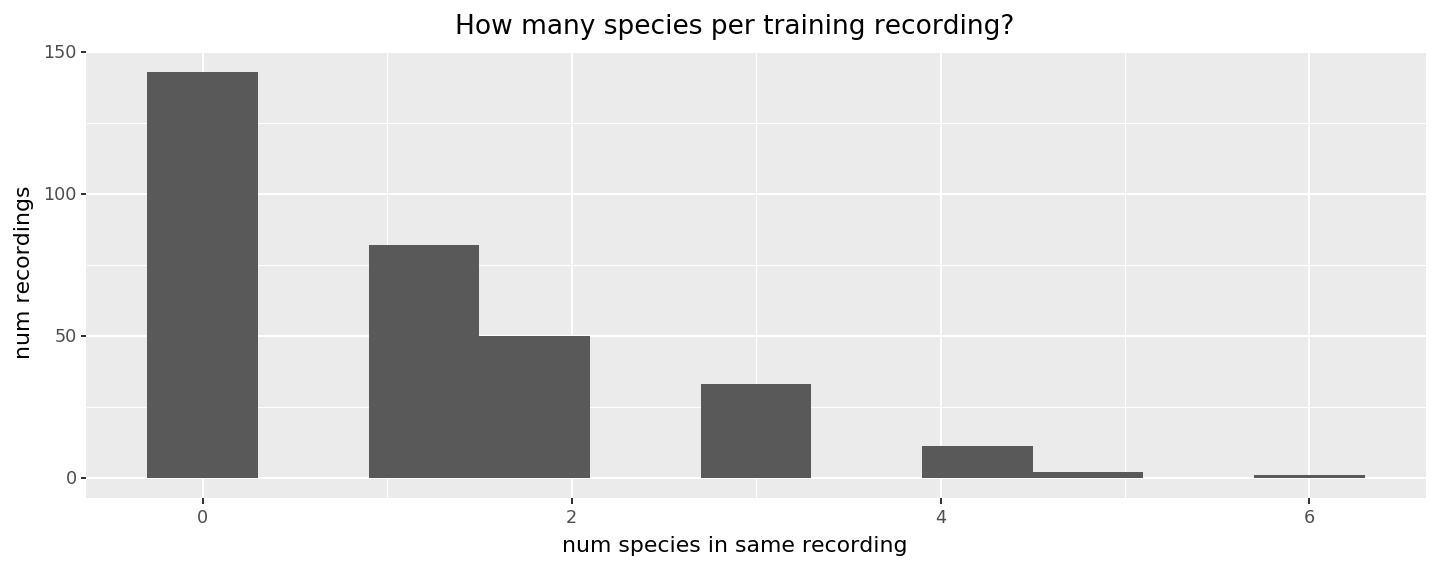

<ggplot: (-9223372036546865604)>

In [ ]:
(train_labels_df
    ['[labels]']
    .fillna('')
    .map(lambda s: [int(x) for x in s.split(',') if x != ''])
    .map(lambda class_ids: len(class_ids))
    .pipe(gghist)
    + xlab('num species in same recording')
    + ylab('num recordings')
    + ggtitle('How many species per training recording?')
)

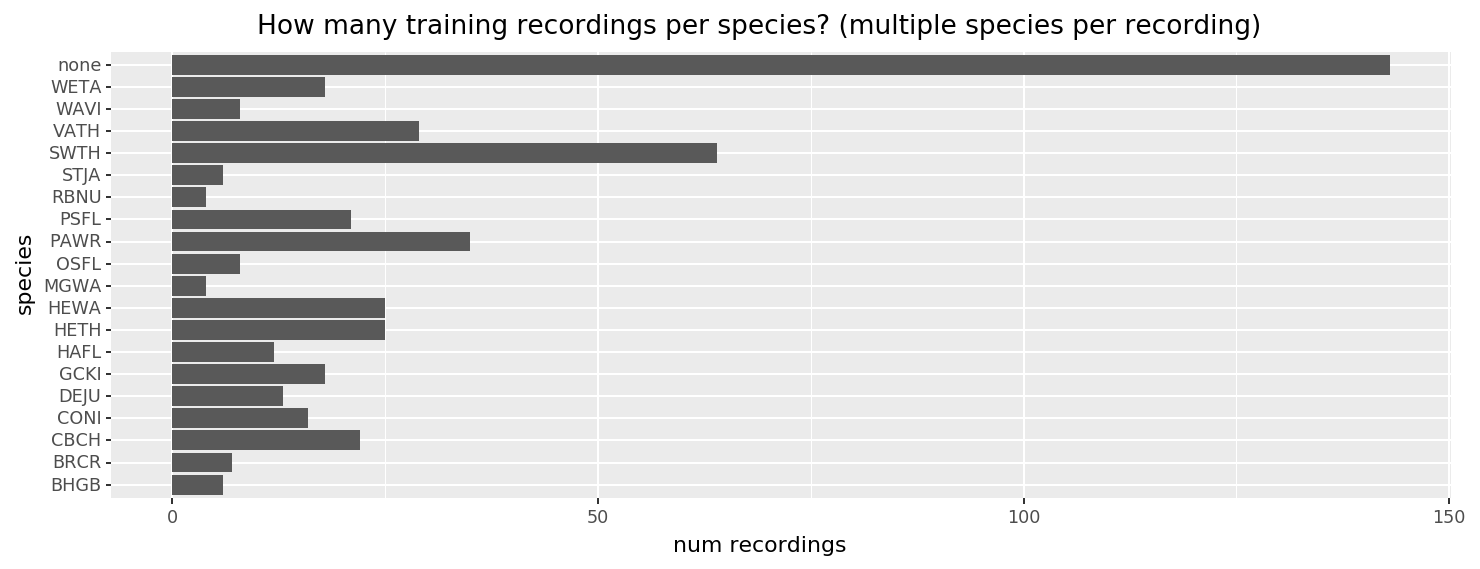

<ggplot: (310607943)>

In [ ]:
(train_labels_df
    .fillna({'[labels]': '-1'})
    .astype({'rec_id': 'int'})
    .set_index('rec_id')['[labels]']
    .fillna('')
    .map(lambda s: [int(x) for x in s.split(',') if x != ''])
    .apply(pd.Series).unstack()  # flatmap
    .reset_index(level=0, drop=True)  # Drop 'level' index
    .sort_index().reset_index()  # Sort and reset 'rec_id' index
    .rename(columns={0: 'class_id'})
    .dropna()
    .merge(species_df, how='left', on='class_id').drop(columns=['class_id'])
    .fillna({'code': 'none', 'species': 'none'})
    .pipe(ggplot, aes(x='code'))
    + geom_bar()
    + coord_flip()
    + xlab('species')
    + ylab('num recordings')
    + ggtitle('How many training recordings per species? (multiple species per recording)')
)

In [ ]:
recs_paths = load_recs_paths(['mlsp-2013'])
display(
    recs_paths.shape,
    recs_paths.groupby('dataset').head(5),
    recs_paths.dataset.value_counts(),
)

(645, 2)

,dataset,path
0,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010.wav
1,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020.wav
2,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030.wav
3,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040.wav
4,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010.wav


mlsp-2013    645
Name: dataset, dtype: int64

In [ ]:
recs = load_recs_data(
    (recs_paths
        # .sample(1000)  # For faster dev
    ),
    # FIXME pickling AudioSegment's across processes makes this (1) slow and (2) super-linearly slow
    #   - TODO We want 'processes' par for converting audio to std .wav format and 'threads' par for loading from std
    #     .wav, so split the convert (metadata_only=True) + load (metadata_only=False) steps to separate these concerns
    # metadata_only=True, dask_opts=dict(scheduler='processes'),
    metadata_only=False, dask_opts=dict(scheduler='threads'),
)
display(
    recs.shape,
    recs[:20],
    recs[:1].T,
)

[                                                                                          ] | 0% Completed |  0.0s

[#####                                                                                     ] | 6% Completed |  0.3s

[############                                                                              ] | 13% Completed |  0.4s

[######################                                                                    ] | 24% Completed |  0.5s

[#############################                                                             ] | 32% Completed |  0.6s

[######################################                                                    ] | 42% Completed |  0.7s

[##############################################                                            ] | 51% Completed |  0.8s

[#######################################################                                   ] | 61% Completed |  0.9s

[##############################################################                            ] | 69% Completed |  1.0s

[#####################################################################                     ] | 77% Completed |  1.1s

[###########################################################################               ] | 83% Completed |  1.3s

[#################################################################################         ] | 90% Completed |  1.4s

[##########################################################################################] | 100% Completed |  1.5s

(645, 12)

,dataset,species,species_longhand,species_com_name,species_query,basename,name,duration_s,samples_mb,samples_n,samples,audio
530,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040,10.0,0.421,220500,[130 118 85 ... -33 -56 -36],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
370,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC1_20090804_050011_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020,10.0,0.421,220500,[17 8 8 ... 37 48 57],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
474,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040,10.0,0.421,220500,[ -5 -25 -32 ... -10 17 34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
529,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030,10.0,0.421,220500,[-51 -18 -13 ... -58 -76 -34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
205,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC16_20090513_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020,10.0,0.421,220500,[ 10 20 -5 ... -14 -38 -37],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
544,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020,10.0,0.421,220500,[232 302 96 ... 126 145 94],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
500,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020,10.0,0.421,220500,[26 3 -5 ... 12 15 -1],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
502,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040,10.0,0.421,220500,[ -4 3 7 ... -48 -27 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
359,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030,10.0,0.421,220500,[-16 -69 -92 ... -78 -51 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
360,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040,10.0,0.421,220500,[-83 -92 -35 ... -58 -62 -46],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


,530
dataset,mlsp-2013
species,CONI
species_longhand,Common Nighthawk - CONI
species_com_name,Common Nighthawk
species_query,CONI
basename,PC5_20090804_050000_0040
name,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040
duration_s,10
samples_mb,0.421
samples_n,220500


In [ ]:
# Stats
(recs
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
    .dropna()
)

n  duration_h  samples_gb  samples_n
dataset   species                                          
mlsp-2013 CONI       8.0       0.022   3.286e-03  1.764e+06
          HAFL       3.0       0.008   1.232e-03  6.615e+05
          PSFL       2.0       0.006   8.214e-04  4.410e+05
          WAVI       1.0       0.003   4.107e-04  2.205e+05
          STJA       4.0       0.011   1.643e-03  8.820e+05
          CBCH       4.0       0.011   1.643e-03  8.820e+05
          RBNU       1.0       0.003   4.107e-04  2.205e+05
          BRCR       2.0       0.006   8.214e-04  4.410e+05
          PAWR      10.0       0.028   4.107e-03  2.205e+06
          GCKI       3.0       0.008   1.232e-03  6.615e+05
          SWTH      12.0       0.033   4.929e-03  2.646e+06
          HETH       9.0       0.025   3.696e-03  1.984e+06
          VATH       7.0       0.019   2.875e-03  1.544e+06
          MGWA       2.0       0.006   8.214e-04  4.410e+05
          HEWA      10.0       0.028   4.107e-03  2.205e+06
          DEJU       1.0       0.003   4.107e-04  2.205e+05
          WETA       2.0       0.006   8.214e-04  4.410e+05
          _UNK     324.0       0.900   1.331e-01  7.144e+07
          _MUL      97.0       0.269   3.984e-02  2.139e+07
          _NON     143.0       0.397   5.873e-02  3.153e+07

In [ ]:
recs_multi = (recs
    .pipe(df_flatmap_list_col, 'species', lambda s: s.str.split(','))
)
display(
    recs_multi.shape,
    recs_multi[:20]
)

(645, 12)

,dataset,species,species_longhand,species_com_name,species_query,basename,name,duration_s,samples_mb,samples_n,samples,audio
0,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040,10.0,0.421,220500,[130 118 85 ... -33 -56 -36],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
1,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC1_20090804_050011_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020,10.0,0.421,220500,[17 8 8 ... 37 48 57],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
2,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040,10.0,0.421,220500,[ -5 -25 -32 ... -10 17 34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
3,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030,10.0,0.421,220500,[-51 -18 -13 ... -58 -76 -34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
4,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC16_20090513_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020,10.0,0.421,220500,[ 10 20 -5 ... -14 -38 -37],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
5,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020,10.0,0.421,220500,[232 302 96 ... 126 145 94],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
6,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020,10.0,0.421,220500,[26 3 -5 ... 12 15 -1],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
7,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040,10.0,0.421,220500,[ -4 3 7 ... -48 -27 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
8,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030,10.0,0.421,220500,[-16 -69 -92 ... -78 -51 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
9,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040,10.0,0.421,220500,[-83 -92 -35 ... -58 -62 -46],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


In [ ]:
# Stats
(recs_multi
    .fillna('')
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
)

n  duration_h  samples_gb  samples_n
dataset   species                                        
mlsp-2013 BRCR       2       0.006   8.214e-04     441000
          CBCH       4       0.011   1.643e-03     882000
          CONI       8       0.022   3.286e-03    1764000
          DEJU       1       0.003   4.107e-04     220500
          GCKI       3       0.008   1.232e-03     661500
          HAFL       3       0.008   1.232e-03     661500
          HETH       9       0.025   3.696e-03    1984500
          HEWA      10       0.028   4.107e-03    2205000
          MGWA       2       0.006   8.214e-04     441000
          PAWR      10       0.028   4.107e-03    2205000
          PSFL       2       0.006   8.214e-04     441000
          RBNU       1       0.003   4.107e-04     220500
          STJA       4       0.011   1.643e-03     882000
          SWTH      12       0.033   4.929e-03    2646000
          VATH       7       0.019   2.875e-03    1543500
          WAVI       1       0.003   4.107e-04     220500
          WETA       2       0.006   8.214e-04     441000
          _MUL      97       0.269   3.984e-02   21388500
          _NON     143       0.397   5.873e-02   31531500
          _UNK     324       0.900   1.331e-01   71442000

In [ ]:
# TODO
#   - [ ] Inspect random spectros: how much non-bird time? how much noise?

In [ ]:
recs_test = (recs
    [lambda df: ~df.species.isin(['XXXX', 'none'])]
    [lambda df: df.species.str.split(',').str.len() == 1]
)
display(
    recs_test.shape,
    recs_test[:10],
    (recs_test
        .assign(n=1)
        .groupby(['dataset', 'species'])
        ['n'].sum()
    ),
)

(645, 12)

,dataset,species,species_longhand,species_com_name,species_query,basename,name,duration_s,samples_mb,samples_n,samples,audio
530,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040,10.0,0.421,220500,[130 118 85 ... -33 -56 -36],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
370,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC1_20090804_050011_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020,10.0,0.421,220500,[17 8 8 ... 37 48 57],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090804_050011_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
474,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20090804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040,10.0,0.421,220500,[ -5 -25 -32 ... -10 17 34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20090804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
529,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20090804_050000_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030,10.0,0.421,220500,[-51 -18 -13 ... -58 -76 -34],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20090804_050000_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
205,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC16_20090513_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020,10.0,0.421,220500,[ 10 20 -5 ... -14 -38 -37],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC16_20090513_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
544,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC5_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020,10.0,0.421,220500,[232 302 96 ... 126 145 94],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC5_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
500,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0020,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020,10.0,0.421,220500,[26 3 -5 ... 12 15 -1],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
502,mlsp-2013,CONI,Common Nighthawk - CONI,Common Nighthawk,CONI,PC4_20100804_050000_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040,10.0,0.421,220500,[ -4 3 7 ... -48 -27 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC4_20100804_050000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
359,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0030,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030,10.0,0.421,220500,[-16 -69 -92 ... -78 -51 -13],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
360,mlsp-2013,HAFL,Hammond's Flycatcher - HAFL,Hammond's Flycatcher,HAFL,PC1_20090606_070012_0040,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040,10.0,0.421,220500,[-83 -92 -35 ... -58 -62 -46],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_070012_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


dataset    species
mlsp-2013  CONI         8
           HAFL         3
           PSFL         2
           WAVI         1
           STJA         4
           CBCH         4
           RBNU         1
           BRCR         2
           PAWR        10
           GCKI         3
           SWTH        12
           HETH         9
           VATH         7
           MGWA         2
           HEWA        10
           DEJU         1
           WETA         2
           _UNK       324
           _MUL        97
           _NON       143
Name: n, dtype: int64

In [ ]:
# Spectros
model = Model(verbose_config=False)
display(dict(model.config))
spectros = Model._spectros(df_rows(recs_test), **model.config.patch_config.spectro_config)
display(len(spectros))

{
  'agg_config': Dict({'funs': ['mean', 'std', 'max']}),
  'class_knn_config': Dict({'n_neighbors': 3}),
  'patch_config': Dict({
    'patch_length': 4,
    'spectro_config': Dict({
      'f_bins': 40,
      'f_min': 1000,
      'frame_length': 512,
      'frame_window': 'hann',
      'hop_length': 256,
      'sample_rate': 22050,
    }),
  }),
  'proj_skm_config': Dict({'k': 500, 'variance_explained': 0.99}),
  'verbose_config': False,
}

________________________________________________________________________________
[Memory] Calling sp14.model._spectros_cache_block...
_spectros_cache_block(<class 'sp14.model.Model'>, [ dataset                                                                                                                                                                                                           mlsp-2013
species                                                                                                                                                                                                                _UNK
species_longhand                                                                                                                                                                                             Unknown - _UNK
species_com_name                      ..., sample_rate=22050, f_min=1000, f_bins=40, hop_length=256, frame_length=512, frame_window='hann', __cache_versio

Persisting in /Users/danb/hack/bubo/data/cache/joblib/sp14/model/_spectros_cache_block/c76d47f651d317c921e7297a9756e9c5


____________________________________________spectros_cache_block - 14.1s, 0.2min


/Users/danb/hack/bubo/features/cache.py:93: UserWarning: Persisting input arguments took 2.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return cache_func(*args, **kwargs)


645

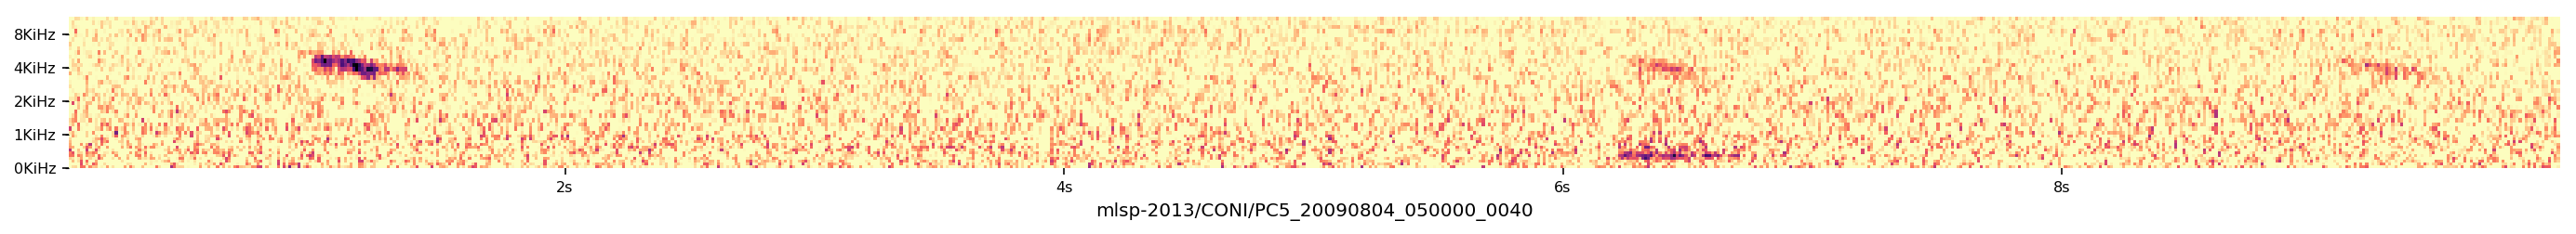

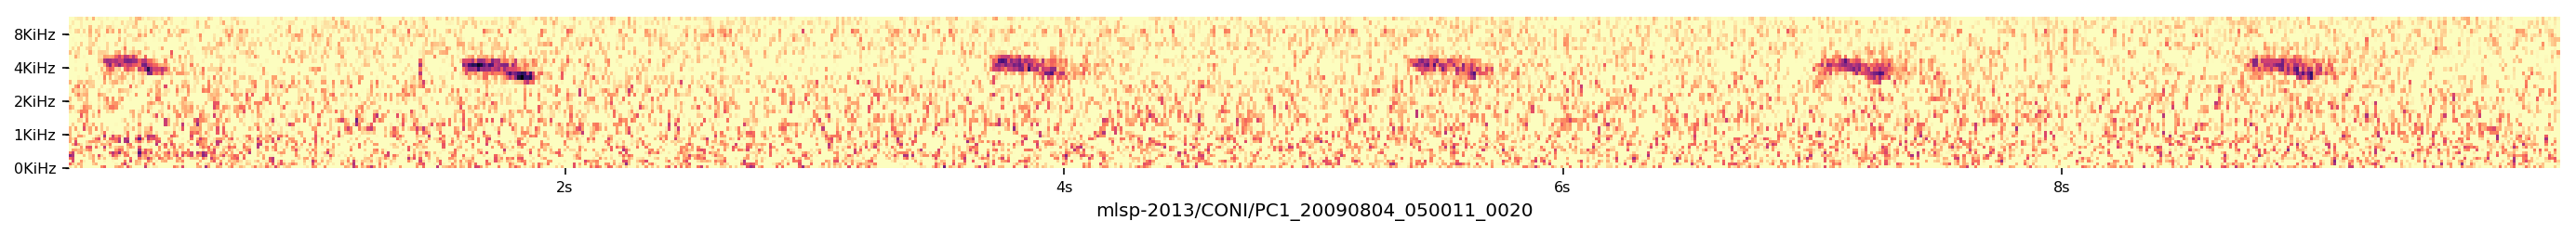

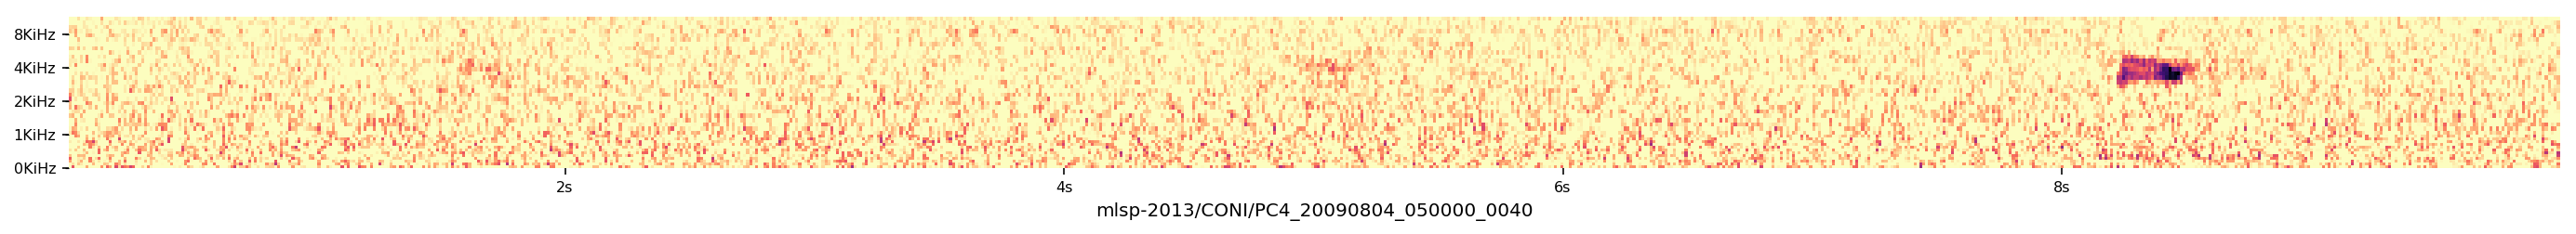

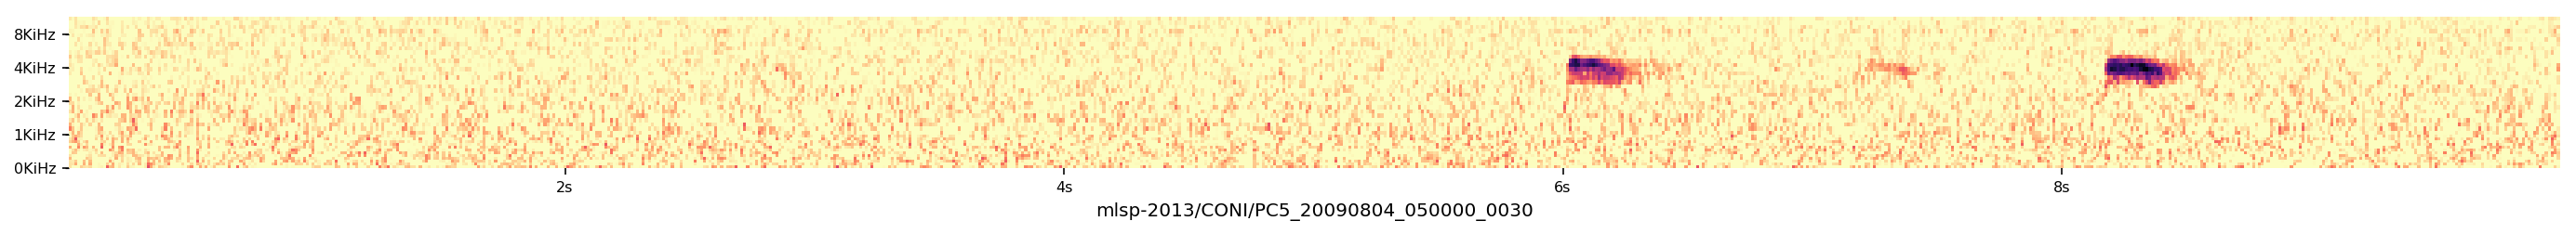

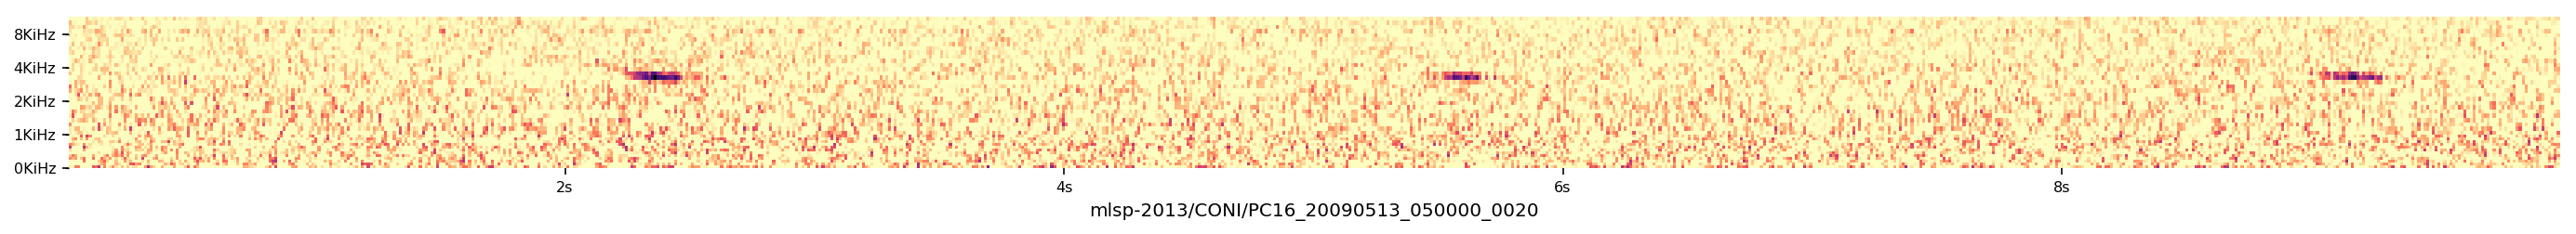

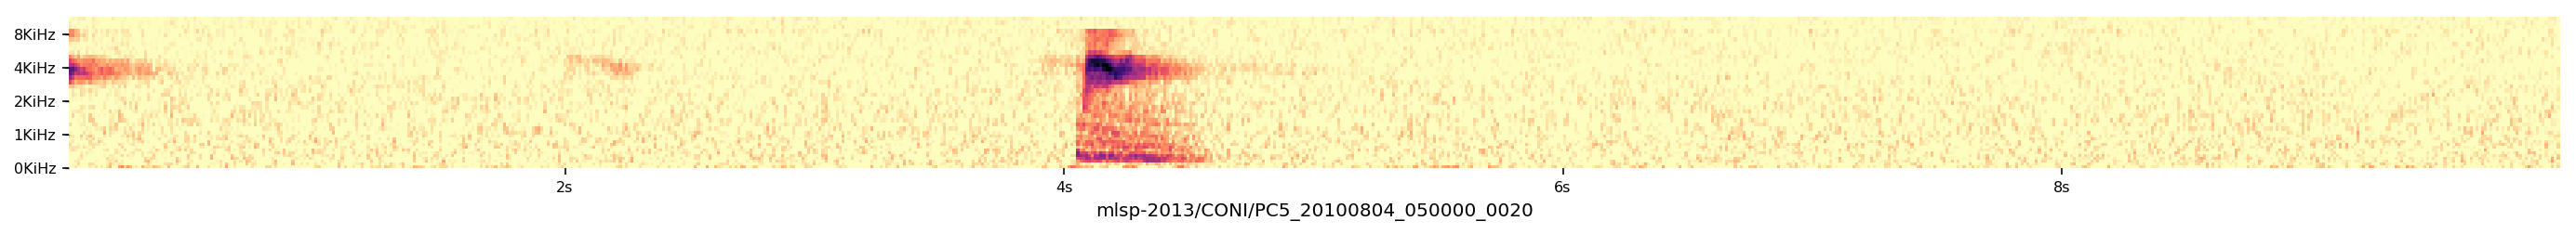

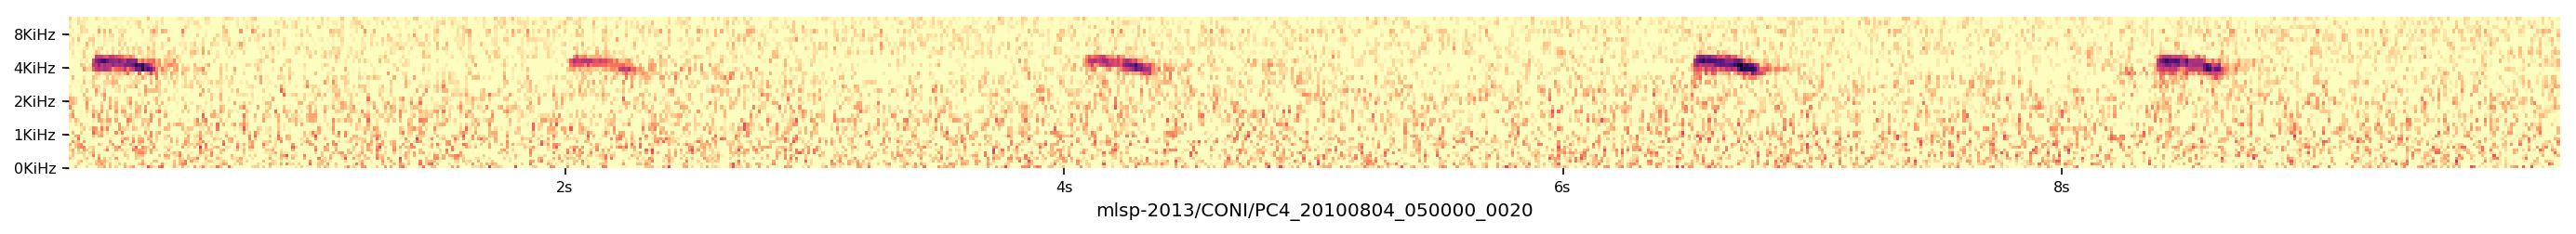

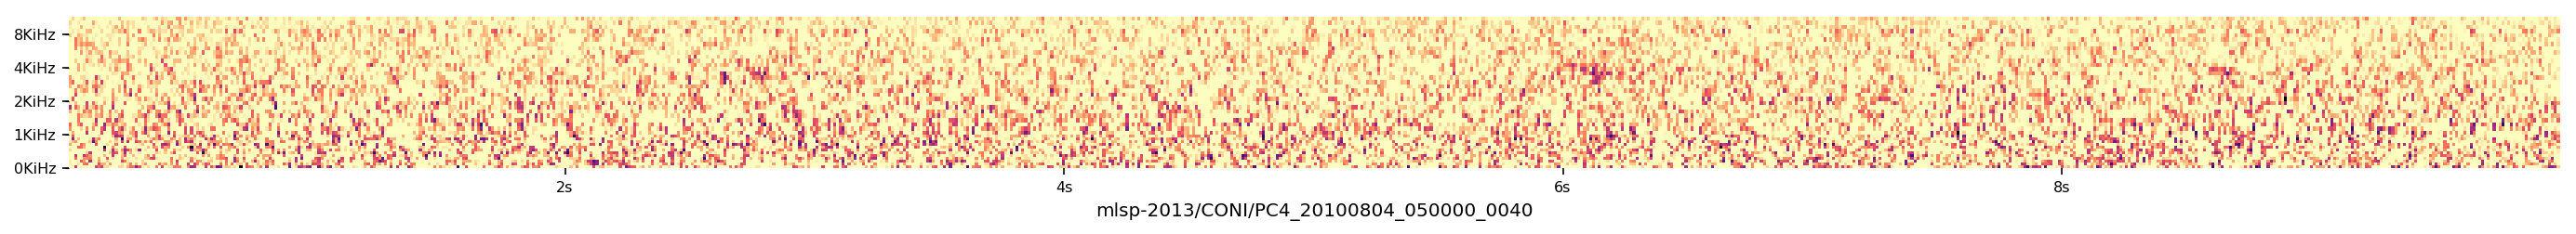

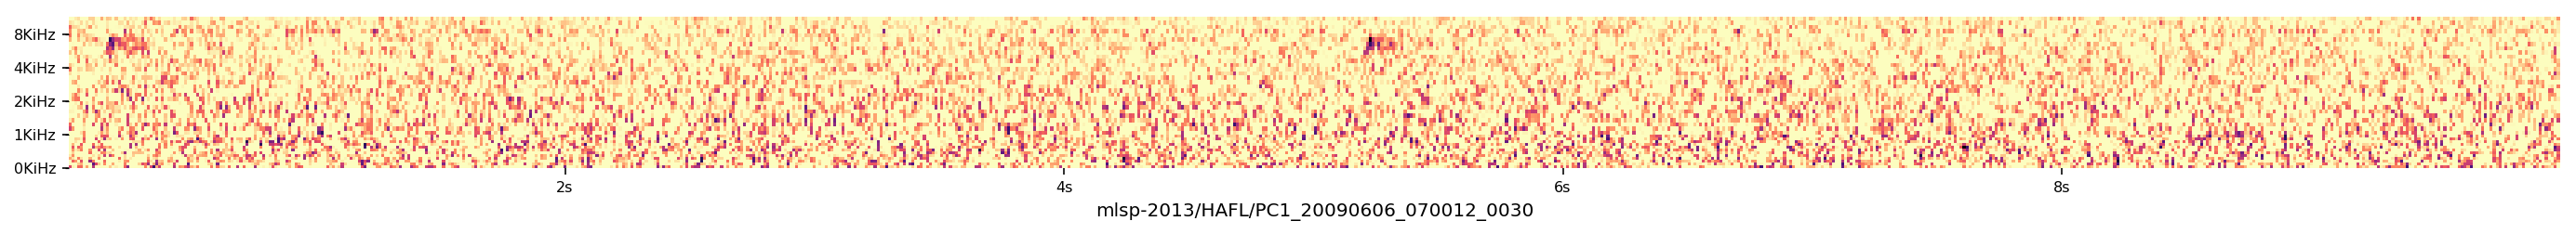

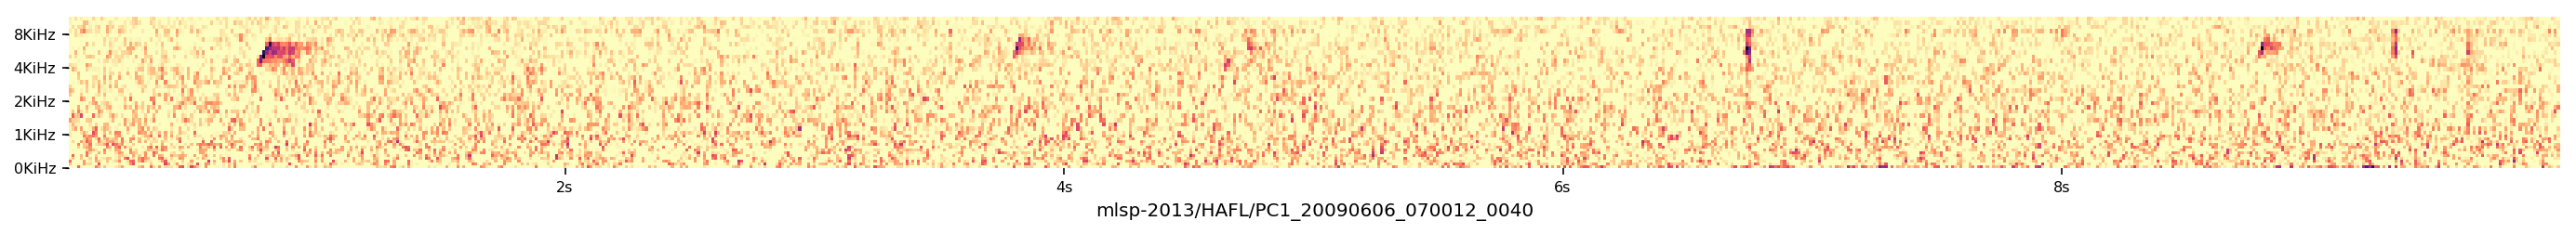

In [ ]:
with with_figsize(width=24, aspect_ratio=1/16):
    for spectro in spectros[:10]:
        spectro.plot(show_audio=False, fancy=False)
        plt.show()

In [ ]:
%%time
# from sp14.model import *
# for i, config in enumerate([
#     # Dict(n=None, proj_skm_config=dict(k=40, normalize=False, standardize=False, pca_whiten=True, do_pca=True)),  # Full (slow)
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=False, standardize=False, pca_whiten=True, do_pca=True)),  # Defaults
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=False, standardize=False, pca_whiten=False, do_pca=False)),
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=True, standardize=False, pca_whiten=False, do_pca=False)),
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=False, standardize=True, pca_whiten=False, do_pca=False)),
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=True, standardize=True, pca_whiten=False, do_pca=False)),
#     Dict(n=50, proj_skm_config=dict(k=40, normalize=True, standardize=True, pca_whiten=True, do_pca=True)),
# ]):
#     print(f'\n\ni[{i}] config[{config}]\n\n')
#     model = Model(
#         verbose_config=False,
#         proj_skm_config=config.proj_skm_config,
#     )
#     # model.proj_skm_.args  # [Can't run until after model.fit_proj, below]
#
#     # %%
#     recs_test_n = (recs_test
#         .pipe(sklearn.utils.shuffle, random_state=0)
#         [:config.n]
#     )
#
#     # %%time
#     # One skm example per rec (not one per recs_multi)
#     #   - recs: 248s, 645 recs, 552765 patches
#     #   - recs[:100]: 30s, 100 recs, 85700 patches
#     #   - recs[:10]: (fast), 10 recs, 8570 patches
#     model.fit_proj(recs_test_n)
#
#     # %%
#     # # TODO
#     # #   - [ ] Inspect learned centroid patches: do they look plausible?
#
#     # %%
#     # # skm.transform(X)
#     # # = (skm._pca_transform(X).T @ skm.D).T
#     # # = (skm.pca.transform(X.T) @ skm.D).T
#     # # = (X.T @ skm.pca.components_.T @ skm.D).T
#     # # = skm.D.T @ skm.pca.components_ @ X
#     # #
#     # # skm.transform
#     # # = skm.D.T @ skm.pca.components_
#
#     # %%
#     skm = model.proj_skm_
#     skm_transform = (skm.D.T @ skm.pca.components_).T
#     # display(
#     #     skm.D.shape,
#     #     skm.D,
#     #     skm.pca.components_.shape,
#     #     skm.pca.components_,
#     #     skm_transform.shape,
#     #     skm_transform,
#     # )
#
#     # %%
#     # plt.imshow(skm.D, origin='lower')
#
#     # %%
#     # plt.imshow(skm_transform, origin='lower')
#
#     # %%
#     (fp, k) = skm_transform.shape
#     p = 4
#     f = fp // p
#     x = np.array([
#         skm_transform[i*f:(i+1)*f, j]
#         for i in range(p)
#         for j in range(k)
#     ]).T
#     # display(skm_transform.shape)
#     # display(x.shape)
#     plt.pcolormesh(x[:, :160])
#     plt.show()
#
#     # # %%
#     # model.fit_class(recs_test_n)
#     # display(
#     #     model.test(recs_test_n, 'classes'),
#     #     model.test(recs_test_n, 'kneighbors'),
#     # )